In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data.dataloader import DataLoader
import tiktoken

from src.data_loader import load_data
from src.utils import load_config
from src import wikipedia_article_dataset
from src.models import CNNModel, MultilabelCNNModel
from src.evaluation import evaluate_model

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


## Binary Classification

In [2]:
MAX_LENGTH = 400
BATCH_SIZE = 16

EMBEDDING_DIM = 128
NUM_FILTERS = 10
FILTER_SIZES = [3, 4, 5]
DROPOUT = 0.5

In [3]:
from src.utils import load_config
from main import run_preprocessing_pipeline
from sklearn.model_selection import train_test_split

config = load_config("just-load")

X, y = run_preprocessing_pipeline(config)

y = y["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-06 22:36:46,931 - src.utils - INFO - Loading config from configs/just-load.yaml.
2025-03-06 22:36:46,937 - src.data_loader - INFO - Loading data with {'good_file': '/Users/robinsuxdorf/Documents/Uni/FernUni Hagen/4. Semester/Projektpraktikum/github/good.csv', 'promo_file': '/Users/robinsuxdorf/Documents/Uni/FernUni Hagen/4. Semester/Projektpraktikum/github/promotional.csv', 'shuffle': False, 'nrows': 250, 'save': 'loaded_data_binary.csv'}
2025-03-06 22:36:46,938 - src.data_loader - INFO - Loading non-promotional and promotional data for binary classification.
2025-03-06 22:36:47,168 - src.utils - INFO - Data saved to data/intermediary/loaded_data_binary.csv.
2025-03-06 22:36:47,169 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_binary.csv'}
2025-03-06 22:36:47,170 - src.preprocessing - INFO - 

In [4]:
model = CNNModel(X_train.shape[1])

In [14]:
model.fit(X_train, y_train, 0.001, 3, BATCH_SIZE)

Epoch 1/3, Loss: 0.0000
Epoch 2/3, Loss: 0.0000
Epoch 3/3, Loss: 0.0000


In [15]:
predictions = model.predict(X_test)

2025-03-06 22:37:45,884 - src.evaluation - INFO - Evaluating the model.
2025-03-06 22:37:45,915 - src.evaluation - INFO - Accuracy: 95.00%
2025-03-06 22:37:45,931 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       1.00      0.91      0.95        54

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

2025-03-06 22:37:45,936 - src.evaluation - INFO - Confusion Matrix:
[[46  0]
 [ 5 49]]
2025-03-06 22:37:46,046 - src.evaluation - INFO - Evaluation finished.


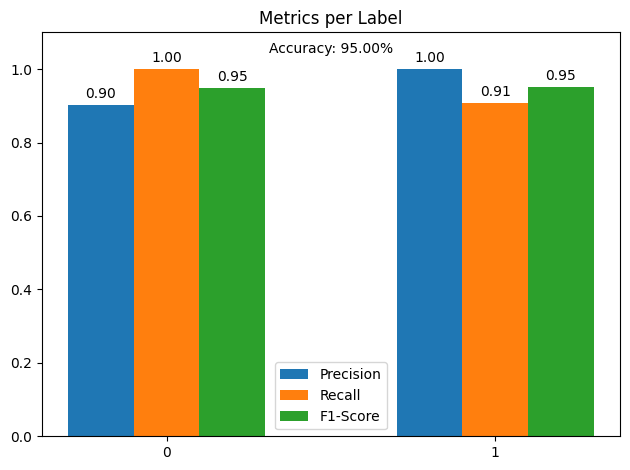

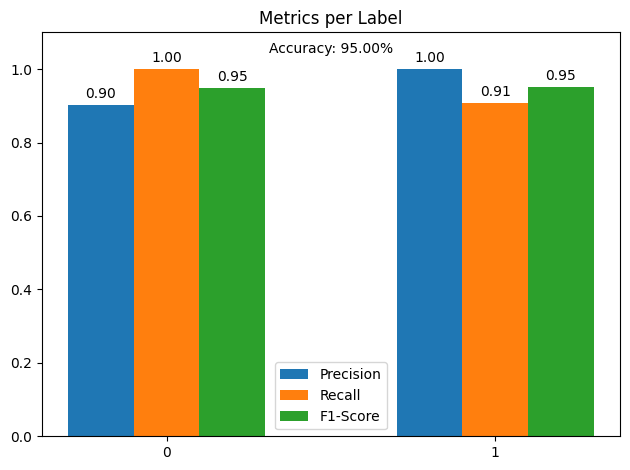

In [16]:
evaluate_model(model, X_test, y_test)

## Multilabel Classification

In [ ]:
config = load_config("just-load")
df = load_data(config["data_loader"], "multilabel")
df

In [ ]:
model = MultilabelCNNModel(
    EMBEDDING_DIM,
    NUM_FILTERS,
    FILTER_SIZES,
    MAX_LENGTH
)

texts = df["text"].tolist()

columns = ["advert", "coi", "fanpov", "pr", "resume"]
labels = df[columns].values.tolist()

In [ ]:
model.fit(texts, labels, learning_rate=0.01, num_epochs=3, batch_size=16)

In [ ]:
predictions = model.predict(texts)

In [ ]:
for i, col in enumerate(columns):
    pred_col = [p[i] for p in predictions]
    label_col = [l[i] for l in labels]

    print(f"Classification Report for {col}:")
    print(classification_report(label_col, pred_col))